In [36]:
library(dplyr)
library(ggplot2)

data<-read.csv("/content/online_sales_dataset.csv", stringsAsFactors = FALSE)
head(data)
str(data)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
2,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
3,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
4,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
5,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NA,United Kingdom,1.501433,Bank Transfer,NA,Electronics,In-store,Not Returned,FedEx,,Medium
6,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887,Sweden,0.480000,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium


'data.frame':	14983 obs. of  17 variables:
 $ InvoiceNo        : int  221958 771155 231932 465838 359178 744167 210268 832180 154886 237337 ...
 $ StockCode        : chr  "SKU_1964" "SKU_1241" "SKU_1501" "SKU_1760" ...
 $ Description      : chr  "White Mug" "White Mug" "Headphones" "Desk Lamp" ...
 $ Quantity         : int  38 18 49 14 -30 47 25 8 19 40 ...
 $ InvoiceDate      : chr  "2020-01-01 00:00" "2020-01-01 01:00" "2020-01-01 02:00" "2020-01-01 03:00" ...
 $ UnitPrice        : num  1.71 41.25 29.11 76.68 -68.11 ...
 $ CustomerID       : num  37039 19144 50472 96586 NA ...
 $ Country          : chr  "Australia" "Spain" "Germany" "Netherlands" ...
 $ Discount         : num  0.47 0.19 0.35 0.14 1.5 ...
 $ PaymentMethod    : chr  "Bank Transfer" "paypall" "Bank Transfer" "paypall" ...
 $ ShippingCost     : num  10.79 9.51 23.03 11.08 NA ...
 $ Category         : chr  "Apparel" "Electronics" "Electronics" "Accessories" ...
 $ SalesChannel     : chr  "In-store" "Online" "Online" "Onli

In [37]:
missing_values <- colSums(is.na(data))
print(missing_values)

        InvoiceNo         StockCode       Description          Quantity 
                0                 0                 0                 0 
      InvoiceDate         UnitPrice        CustomerID           Country 
                0                 0              1452                 0 
         Discount     PaymentMethod      ShippingCost          Category 
                0                 0               731                 0 
     SalesChannel      ReturnStatus  ShipmentProvider WarehouseLocation 
                0                 0                 0                 0 
    OrderPriority 
                0 


In [38]:
data$CustomerID <- as.character(data$CustomerID)
data$CustomerID[is.na(data$CustomerID)] <- "Unknown"
data$CustomerID <- as.factor(data$CustomerID)
data$ShippingCost[is.na(data$ShippingCost)] <- mean(data$ShippingCost, na.rm = TRUE)

data$InvoiceDate <- as.POSIXct(data$InvoiceDate, format="%Y-%m-%d %H:%M")

data <- distinct(data)
data <- data %>% filter(Quantity > 0, UnitPrice > 0)
summary(data)
str(data)

   InvoiceNo       StockCode         Description           Quantity    
 Min.   :100037   Length:14253       Length:14253       Min.   : 1.00  
 1st Qu.:329189   Class :character   Class :character   1st Qu.:13.00  
 Median :555433   Mode  :character   Mode  :character   Median :25.00  
 Mean   :553888                                         Mean   :24.96  
 3rd Qu.:780546                                         3rd Qu.:37.00  
 Max.   :999993                                         Max.   :49.00  
                                                                       
  InvoiceDate                       UnitPrice       CustomerID   
 Min.   :2020-01-01 00:00:00.00   Min.   : 1.00   Unknown:  722  
 1st Qu.:2020-06-04 18:00:00.00   1st Qu.:25.46   11514  :    4  
 Median :2020-11-07 23:00:00.00   Median :49.69   17797  :    4  
 Mean   :2020-11-07 21:13:12.33   Mean   :50.10   13343  :    3  
 3rd Qu.:2021-04-12 15:00:00.00   3rd Qu.:74.51   14251  :    3  
 Max.   :2021-09-16 06:00:00

'data.frame':	14253 obs. of  17 variables:
 $ InvoiceNo        : int  221958 771155 231932 465838 744167 210268 832180 154886 237337 621430 ...
 $ StockCode        : chr  "SKU_1964" "SKU_1241" "SKU_1501" "SKU_1760" ...
 $ Description      : chr  "White Mug" "White Mug" "Headphones" "Desk Lamp" ...
 $ Quantity         : int  38 18 49 14 47 25 8 19 40 49 ...
 $ InvoiceDate      : POSIXct, format: "2020-01-01 00:00:00" "2020-01-01 01:00:00" ...
 $ UnitPrice        : num  1.71 41.25 29.11 76.68 70.16 ...
 $ CustomerID       : Factor w/ 12538 levels "10003","10009",..: 3750 1259 5611 12049 6046 5064 9036 10877 4094 417 ...
 $ Country          : chr  "Australia" "Spain" "Germany" "Netherlands" ...
 $ Discount         : num  0.47 0.19 0.35 0.14 0.48 0.15 0.04 0.05 0.16 0.19 ...
 $ PaymentMethod    : chr  "Bank Transfer" "paypall" "Bank Transfer" "paypall" ...
 $ ShippingCost     : num  10.79 9.51 23.03 11.08 13.98 ...
 $ Category         : chr  "Apparel" "Electronics" "Electronics" "Accessori

In [39]:
data$Total_Spending <- data$Quantity * data$UnitPrice
customer_spending <- data %>%
  group_by(CustomerID) %>%
  summarise(Total_Spending = sum(Total_Spending, na.rm = TRUE),
            Total_Purchases = n(),
            .groups = "drop")

data$YearMonth <- format(data$InvoiceDate, "%Y-%m")
monthly_spending <- data %>%
  group_by(CustomerID, YearMonth) %>%
  summarise(Monthly_Spending = sum(Total_Spending, na.rm = TRUE),
            .groups = "drop")

customer_recency <- data %>%
  group_by(CustomerID) %>%
  summarise(Last_Purchase = max(InvoiceDate, na.rm = TRUE),
            .groups = "drop")

customer_data <- customer_spending %>%
  left_join(monthly_spending, by = "CustomerID") %>%
  left_join(customer_recency, by = "CustomerID")

head(customer_data)

CustomerID,Total_Spending,Total_Purchases,YearMonth,Monthly_Spending,Last_Purchase
<fct>,<dbl>,<int>,<chr>,<dbl>,<dttm>
10003,377.05,1,2020-08,377.05,2020-08-20 18:00:00
10009,827.84,1,2020-09,827.84,2020-09-06 03:00:00
10010,273.00,1,2020-02,273.00,2020-02-10 06:00:00
10020,1475.16,1,2021-09,1475.16,2021-09-13 06:00:00
10046,1884.48,1,2020-12,1884.48,2020-12-13 08:00:00
10047,271.44,1,2020-06,271.44,2020-06-10 13:00:00


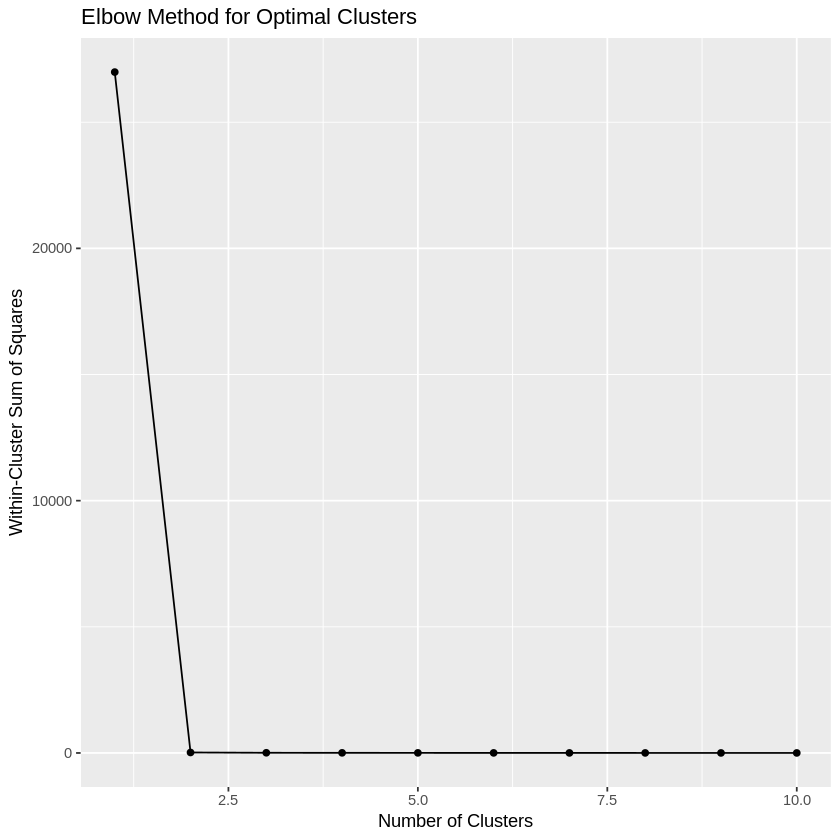

In [41]:
library(cluster)
clustering_data <- customer_data %>%
  select(Total_Spending, Total_Purchases) %>%
  na.omit()

scaled_data <- scale(clustering_data)
wss <- (nrow(scaled_data) - 1) * sum(apply(scaled_data, 2, var))
elbow_data <- data.frame(Clusters = 1:10, WSS = NA)

for (i in 1:10) {
  elbow_data$WSS[i] <- sum(kmeans(scaled_data, centers = i, nstart = 10)$tot.withinss)
}

ggplot(elbow_data, aes(x = Clusters, y = WSS)) +
  geom_line() + geom_point() +
  ggtitle("Elbow Method for Optimal Clusters") +
  xlab("Number of Clusters") + ylab("Within-Cluster Sum of Squares")

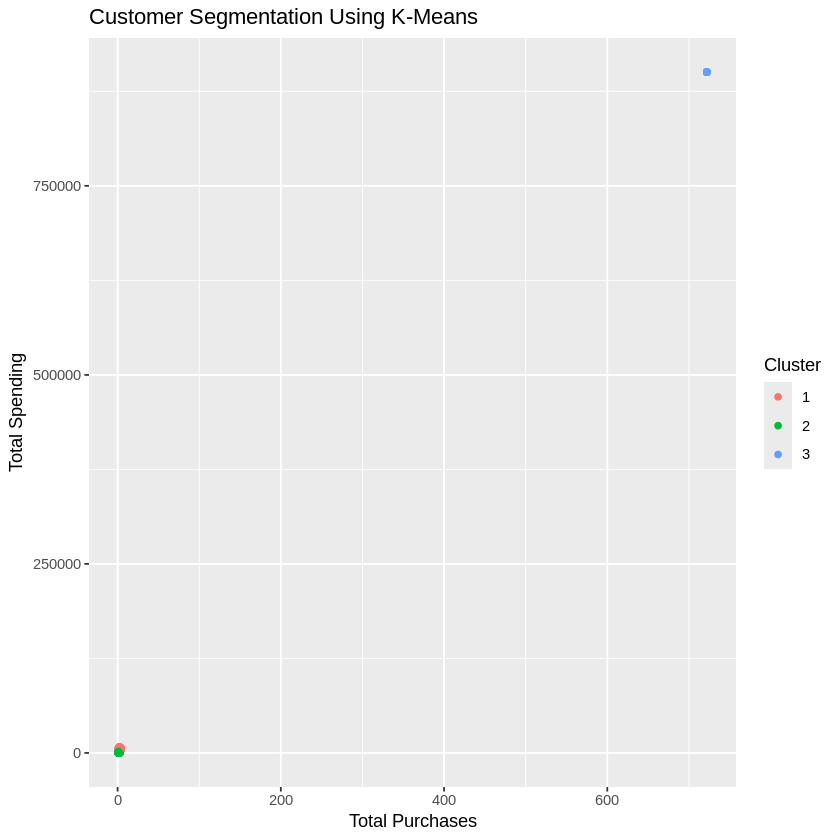

In [43]:
set.seed(123)
kmeans_result <- kmeans(scaled_data, centers = 3, nstart = 10)
customer_data$Cluster <- as.factor(kmeans_result$cluster)
ggplot(customer_data, aes(x = Total_Purchases, y = Total_Spending, color = Cluster)) +
  geom_point() +
  ggtitle("Customer Segmentation Using K-Means") +
  xlab("Total Purchases") + ylab("Total Spending")

In [45]:
customer_data %>%
  group_by(Cluster) %>%
  summarise(Average_Spending = mean(Total_Spending),
            Average_Purchases = mean(Total_Purchases),
            Count = n())

Cluster,Average_Spending,Average_Purchases,Count
<fct>,<dbl>,<dbl>,<int>
1,3023.753,1.321420,4085
2,747.414,1.075407,9389
3,900469.590,722.000000,21


                Total_Spending Total_Purchases     Recency
Total_Spending       1.0000000      0.99946092 -0.06780460
Total_Purchases      0.9994609      1.00000000 -0.06792542
Recency             -0.0678046     -0.06792542  1.00000000


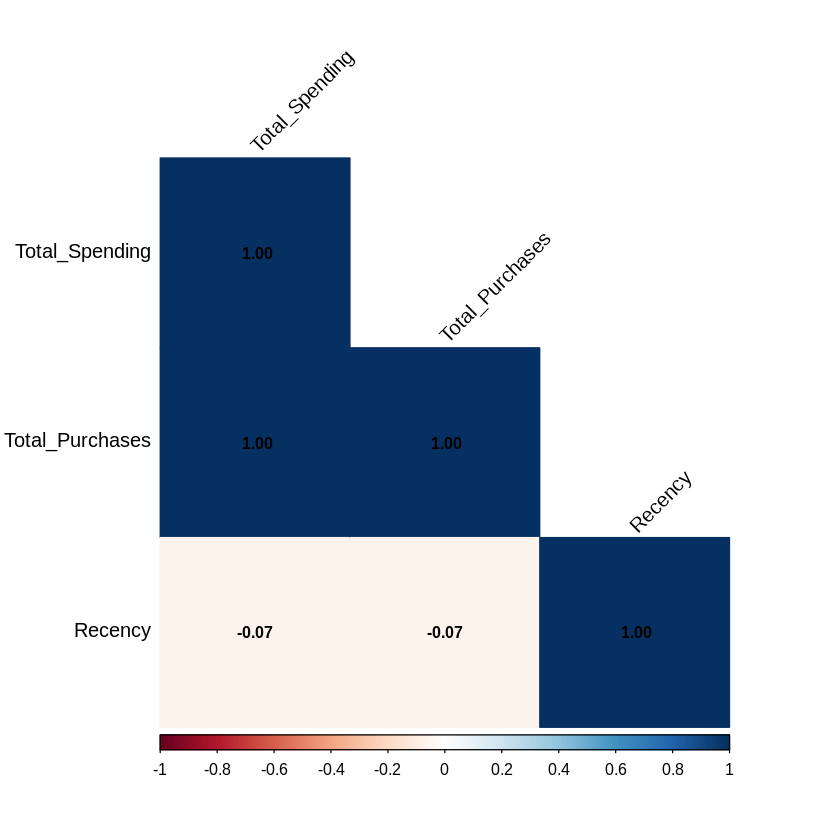

In [52]:
library(reshape2)
library(corrplot)
correlation_data <- customer_data %>%
  select(Total_Spending, Total_Purchases, Last_Purchase) %>%
  na.omit()

correlation_data$Recency <- as.numeric(Sys.Date() - as.Date(correlation_data$Last_Purchase))

cor_matrix <- cor(correlation_data[, c("Total_Spending", "Total_Purchases", "Recency")])

corrplot(cor_matrix, method = "color", type = "lower", addCoef.col = "black",
         tl.col = "black", tl.srt = 45, number.cex = 0.8)

print(cor_matrix)